import相应模块

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation
from keras.optimizers import Adam

载入data

In [5]:
def load_data(file):
    data = []
    label = []
    with open(file,"r") as data_file:
        raw_data = data_file.readlines()
        for raw_line in raw_data:
            sample=raw_line[:-1]
            sample = sample.split(",")
            label.append(sample[-1])
            sample=np.array([float(feature) for feature in sample[:-1]])
            sample[-3]/=1000
            sample[-2]/=1000
            sample[-1]/=1000
            data.append(sample)
    return np.array(data),np.array(label)

In [6]:
train_data,train_label=load_data("./train.data")
test_data,test_label=load_data("./test.data")

In [7]:
train_data[0]

array([0.      , 0.64    , 0.64    , 0.      , 0.32    , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.64    ,
       0.      , 0.      , 0.      , 0.32    , 0.      , 1.29    ,
       1.93    , 0.      , 0.96    , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.778   , 0.      , 0.      ,
       0.003756, 0.061   , 0.278   ])

开始搭建神经网络

In [8]:
model = Sequential([
    Dense(32,input_dim=57),
    Activation("softplus"),
    Dropout(0.5),
    Dense(1),
    Activation("sigmoid")
    ])

In [9]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer = adam,loss = 'binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train_data,
                    train_label,
                    epochs = 40,
                    batch_size = 32,
                    validation_data=(test_data, test_label),
                    verbose=1)

Train on 3224 samples, validate on 1377 samples
Epoch 1/40
3224/3224 [==============================] - 0s - loss: 0.6265 - acc: 0.6756 - val_loss: 0.3845 - val_acc: 0.8773
Epoch 2/40
3224/3224 [==============================] - 0s - loss: 0.4607 - acc: 0.7711 - val_loss: 0.3109 - val_acc: 0.9049
Epoch 3/40
3224/3224 [==============================] - 0s - loss: 0.4011 - acc: 0.8136 - val_loss: 0.2752 - val_acc: 0.9136
Epoch 4/40
3224/3224 [==============================] - 0s - loss: 0.3540 - acc: 0.8496 - val_loss: 0.2527 - val_acc: 0.9172
Epoch 5/40
3224/3224 [==============================] - 0s - loss: 0.3211 - acc: 0.8645 - val_loss: 0.2391 - val_acc: 0.9223
Epoch 6/40
3224/3224 [==============================] - 0s - loss: 0.3253 - acc: 0.8601 - val_loss: 0.2306 - val_acc: 0.9252
Epoch 7/40
3224/3224 [==============================] - 0s - loss: 0.2864 - acc: 0.8824 - val_loss: 0.2238 - val_acc: 0.9274
Epoch 8/40
3224/3224 [==============================] - 0s - loss: 0.2821 - a

In [12]:
history_dict = history.history
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [13]:
epochs = range(1,len(acc)+1)

绘制loss函数曲线

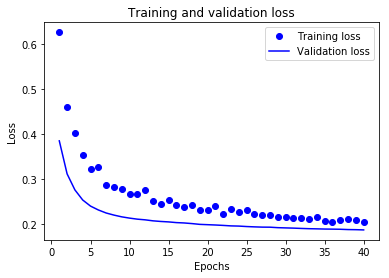

In [14]:
plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

绘制accuracy曲线

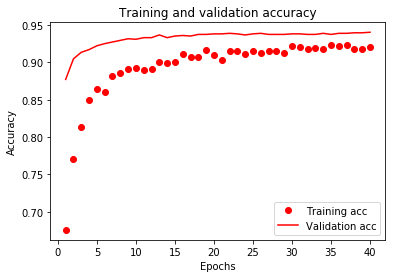

In [15]:
cc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

观察发现，测试集效果好于训练集，可以使用。

保存模型

In [16]:
model.save('my_model.h5')